# Main Aggregation Script - calls lab.py and crystals.py

In [1]:
#Reloads the lab.py and crystals.py modules to update any changes (after saving)
#If a new method or object is created, autoreload doesn't work and the 
#kernel needs to be closed and halted after saving and making a 'checkpoint'
#in this notebook

%load_ext autoreload
%autoreload 2

In [2]:
!jupyter kernelspec list  #list available kernels
#Bad magic number error fix:
#find . -name '*.pyc' -delete

Available kernels:
  ipas_env    /Users/vprzybylo/Library/Jupyter/kernels/ipas_env
  myenv       /Users/vprzybylo/Library/Jupyter/kernels/myenv
  python3     /usr/local/share/jupyter/kernels/python3


In [2]:
#show plots in the notebook, formatting of the plots changes
%matplotlib inline
from ipas import lab_copy_multiagg as lab
from ipas import crystals_opt_rot as crys
from ipas import plots_multiagg as plts
import numpy as np
import time  #for efficiency tests
import itertools   #to create width array and join plate/col aspect ratios
from operator import itemgetter
import shapely.geometry as geom
import matplotlib.pyplot as plt
import scipy.optimize as opt
import random

#### Loops over aspect ratios, creates histograms of each aspect ratio, and plots characteristic values of the distributions with respect to the starting aspect ratios

##### 'PATH' VARIABLE NEEDS TO BE CHANGED IN LAB.PY BEFORE RUNNING -- ALL FOLDERS/FILES WILL BE CREATED IF THEY DO NOT EXIST 
Note, there may be a shape parameter erlang distribution run time warning occasionally <-- disregard

In [20]:
phio=np.logspace(-2, 2., num=20, endpoint=True, base=10.0, dtype=None)#just columns (0,2); plates (-2,0)
#add=np.logspace(-.301, .301, num=5, endpoint=True, base=10.0, dtype=None)
#phio = sorted(np.append(phio, add, axis=0))
#phio = [0.5, 50.0]
#Note, there is the occasional 'erlang distribution warning'

#phio = [.01,.02,.03,.04,.05,.06,.07,.08,.09,.1,.2,.3,.4,\
#        .5,.6,.7,.8,.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
reqarr = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]
#reqarr = [1,2]
numaspectratios=len(phio)
ch_dist='best'         #anything other than gamma uses the characteristic from the best distribution pdf (lowest SSE)
nclusters = [300, 300, 300, 300, 300]        #changes how many aggregates per aspect ratio to consider
ncrystals = 2
minor = 'depth'         #'minorxy' from fit ellipse or 'depth' to mimic IPAS in IDL
save_plots = False     #saves all histograms to path with # of aggs and minor/depth folder
file_ext = 'eps'

import warnings
warnings.filterwarnings("ignore")

#If creating lookup table using lab_lookup use this call to main_ar_loop:
#AND change import from lab_copy to lab_lookup in import statement above
#p300lookup = lab.main_ar_loop(phio, reqarr, numaspectratios, ch_dist, nclusters, ncrystals, minor, save_plots, file_ext)
#Otherwise:

p300multi = lab.main_ar_loop(phio, numaspectratios, ch_dist, nclusters, ncrystals, minor, save_plots, file_ext)

#p300xrot.which_plot(nclusters, plot_name ='complexity', ch_dist=ch_dist, savefile = 'complexity_xrotrand_yrotrand',
#              save=True, ext=file_ext, verbose=True)
#p300.which_plot(nclusters, plot_name ='major_axis', ch_dist=ch_dist, savefile = 'major_axis_mean_error_xrotrand__yrotrand',
#              save=True, ext=file_ext, verbose=True)
#p300xrot.which_plot(nclusters, plot_name ='req', ch_dist=ch_dist, savefile = 'req_mean_error_xrotrand__yrotrand', 
#              save=True, ext=file_ext, verbose=True)
#p300xrot.which_plot(nclusters, plot_name ='overlap', ch_dist=ch_dist, savefile = 'overlap_xrotrand__yrotrand',
#              save=True, ext=file_ext, verbose=True)
#p300xrot.which_plot(nclusters, plot_name ='char', ch_dist=ch_dist, savefile = 'char_mean_error_xrotrand__yrotrand',
#              save=True, ext=file_ext, verbose=True)
#p300xrot.which_plot(nclusters, plot_name ='dphigamW', ch_dist=ch_dist, savefile = 'dphigamW_xrotrand__yrotrand',
#              save=True, ext=file_ext, verbose=True)
#p300xrot.which_plot(nclusters, plot_name ='dphigamquad', ch_dist=ch_dist, savefile = 'dphigamquad_xrotrand__yrotrand',
#              save=True, ext=file_ext, verbose=True)
#p300xrot.which_plot(nclusters, plot_name ='dphigamW', ch_dist=ch_dist, savefile = 'dphigamW_xrotrand__yrotrand',
#              save=True, ext=file_ext, verbose=True)    

eq. vol rad 10.0 0.464158883361 46.4158883361 0.01
--- 2.51 minute(s) ---
eq. vol rad 10.0 0.641235479558 39.4903722958 0.0162377673919
--- 2.45 minute(s) ---
eq. vol rad 10.0 0.88586679041 33.5981828628 0.0263665089873
--- 2.49 minute(s) ---
eq. vol rad 10.0 1.22382493697 28.5851417968 0.0428133239872
--- 2.50 minute(s) ---
eq. vol rad 10.0 1.69071410347 24.3200751327 0.0695192796178
--- 2.41 minute(s) ---
eq. vol rad 10.0 2.33572146909 20.6913808111 0.112883789168
--- 2.43 minute(s) ---
eq. vol rad 10.0 3.22679911995 17.6041084387 0.183298071083
--- 2.47 minute(s) ---
eq. vol rad 10.0 4.45782286042 14.9774747635 0.297635144163
--- 2.48 minute(s) ---
eq. vol rad 10.0 6.15848211066 12.742749857 0.483293023857
--- 2.51 minute(s) ---
eq. vol rad 10.0 8.50794279963 10.8414586894 0.784759970351
--- 2.46 minute(s) ---
eq. vol rad 10.0 11.7537226513 9.22385103936 1.2742749857
--- 2.52 minute(s) ---
eq. vol rad 10.0 16.2377673919 7.84759970351 2.06913808111
--- 2.45 minute(s) ---
eq. vol rad 

In [42]:
p300.which_plot(nclusters, plot_name ='major_axis', ch_dist=ch_dist, savefile = 'major_axis_mean_error_xrotrand_yrotrand',
              save=True, ext=file_ext, verbose=True)
p300.which_plot(nclusters, plot_name ='req', ch_dist=ch_dist, savefile = 'req_mean_error_xrotrand_yrotrand', 
              save=True, ext=file_ext, verbose=True)
p300.which_plot(nclusters, plot_name ='overlap', ch_dist=ch_dist, savefile = 'overlap_xrotrand_yrotrand',
              save=True, ext=file_ext, verbose=True)
p300.which_plot(nclusters, plot_name ='char', ch_dist=ch_dist, savefile = 'char_mean_xrotrand_yrotrand',
              save=True, ext=file_ext, verbose=True)
p300.which_plot(nclusters, plot_name ='dc_da', ch_dist=ch_dist, savefile = 'dc_da_xrotrand_yrotrand',
              save=True, ext=file_ext, verbose=True)
p300.which_plot(nclusters, plot_name ='dphigamquad', ch_dist=ch_dist, savefile = 'dphigamquad_xrotrand_yrotrand',
              save=True, ext=file_ext, verbose=True)
p300.which_plot(nclusters, plot_name ='complexity', ch_dist=ch_dist, savefile = 'complexity_xrotrand_yrotrand',
              save=True, ext=file_ext, verbose=True)

NameError: name 'p300' is not defined

In [21]:
file_ext = 'pdf'
p300multi.which_plot(nclusters, plot_name ='char_multi_agg', ch_dist=ch_dist, savefile = 'char_multi_agg_bestIDL',
              save=True, ext=file_ext, verbose=True)



Saving figure to '/Users/vprzybylo/Desktop/icefiles/agg_model/agg_notes/graphics/python/[300, 300, 300, 300, 300]xtals_hist/depth/char_multi_agg_bestIDL.pdf'...


Call for characteristic plots for each variable

In [112]:
#write_file = 'ac.dat'
#b1.which_plot(plot_name ='overlap',ch_dist=ch_dist, read_file = write_file, savefile = 'overlap',
#              save=True, ext=file_ext, verbose=True)
#b1.which_plot(plot_name ='char', ch_dist=ch_dist, read_file = write_file, savefile = 'char',
#              save=True, ext=file_ext, verbose=True)
#b1.which_plot(plot_name ='dphigamquad', ch_dist=ch_dist, read_file = write_file, savefile = 'dphigamquad',
#              save=True, ext=file_ext, verbose=True)
#b1.which_plot(plot_name ='req', ch_dist=ch_dist, read_file = write_file, savefile = 'req', 
#              save=True, ext=file_ext, verbose=True)
#b1.which_plot(plot_name ='major_axis', ch_dist=ch_dist, read_file = write_file, savefile = 'major_axis',
#              save=True, ext=file_ext, verbose=True)
b1.which_plot(plot_name ='shape', ch_dist=ch_dist, read_file = write_file, savefile = 'shape',
              save=True, ext=file_ext, verbose=True)



Saving figure to '/Users/vprzybylo/Desktop/icefiles/agg_model/agg_notes/graphics/python/3000xtals_hist/depth/phi_shape.png'...
Saving figure to '/Users/vprzybylo/Desktop/icefiles/agg_model/agg_notes/graphics/python/3000xtals_hist/depth/Req_shape.png'...
Saving figure to '/Users/vprzybylo/Desktop/icefiles/agg_model/agg_notes/graphics/python/3000xtals_hist/depth/Depth_shape.png'...
Saving figure to '/Users/vprzybylo/Desktop/icefiles/agg_model/agg_notes/graphics/python/3000xtals_hist/depth/MjrAx_shape.png'...
Saving figure to '/Users/vprzybylo/Desktop/icefiles/agg_model/agg_notes/graphics/python/3000xtals_hist/depth/Ovrlp_shape.png'...


###### Initialize a column; note z is into/out of the page, y is up/vertical, therefore 'falling' into the page

50.0 -50.0
5.0 -5.0
4.33012701892 -4.33012701892


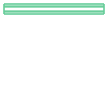

In [17]:
#columns initially  - y axis is up and down, x left right, z into page
length=100
width=10
rotation = [0,0,0]
#rotation = [0,0, random.uniform(0, 2 * np.pi)]
seedcrystal = crys.IceCrystal(length=length, width=width, rotation=rotation)

xmaxseed = seedcrystal.max('x')
xminseed = seedcrystal.min('x')
ymaxseed = seedcrystal.max('y')
yminseed = seedcrystal.min('y')
zmaxseed = seedcrystal.max('z')
zminseed = seedcrystal.min('z')

print(xmaxseed, xminseed)
print(ymaxseed, yminseed)
print(zmaxseed, zminseed)

seedcrystal.plot()

###### Initialize a plate; note z is into/out of the page, y is up/vertical, therefore 'falling' into the page


0.418224532392 0.452313005122 0.10684514172340248


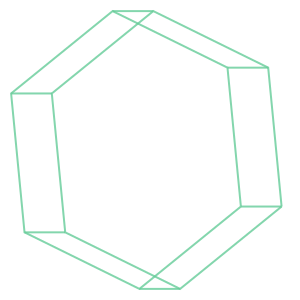

In [3]:
length=30 * 10 #c axis
width=90 * 10 #a axis
plates = width > length

f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[0,x,0]).projectxy().area
yrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x
f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[x,0,0]).projectxy().area
xrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x


yrotrand = random.uniform(-yrot, yrot)
zrot = random.uniform(0, 2 * np.pi)
print(xrot, yrotrand, zrot)

#rotation = [0, 0, 0]            
rotation = [0, yrotrand, zrot]

seedcrystal = crys.IceCrystal(length=length, width=width, rotation=rotation)

xmaxseed = seedcrystal.max('x')
xminseed = seedcrystal.min('x')
ymaxseed = seedcrystal.max('y')
yminseed = seedcrystal.min('y')
zmaxseed = seedcrystal.max('z')
zminseed = seedcrystal.min('z')

#print(xmaxseed, xminseed)
#print(ymaxseed, yminseed)
#print(zmaxseed, zminseed)
#print(seedcrystal.maxz)
seedcrystal.plot()


0.418224532392 0.303790121631 1.3790824679357898


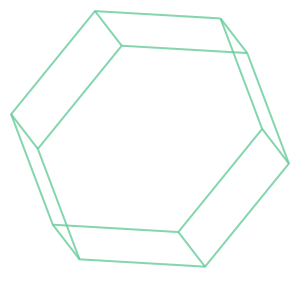

In [4]:
#Plate from top down after reoriention based on the max projected area
length=30 * 10 #c axis
width=90 * 10 #a axis
plates = width > length

f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[0,x,0]).projectxy().area
yrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x
f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[x,0,0]).projectxy().area
xrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x

zrot = random.uniform(0, 2 * np.pi)
yrotrand = random.uniform(-yrot, yrot)
print(xrot, yrotrand, zrot)

rotation = [xrot, yrotrand, zrot]
#rotation = [0,0,0]
seedcrystal = crys.IceCrystal(length=length, width=width, rotation=rotation)
cluster = crys.IceCluster(seedcrystal)
seedcrystal.plot()

0.418224532392 0.474152046463 3.330118267592138


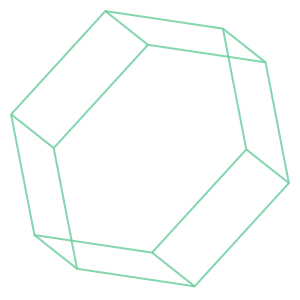

In [5]:
#Initialize a new crystal (plate), same dimensions, again after orientation with max area (top down view)

f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[0,x,0]).projectxy().area
yrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x
f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[x,0,0]).projectxy().area
xrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x

yrotrand = random.uniform(-yrot, yrot)
zrot = random.uniform(0, 2 * np.pi)
print(xrot, yrot, zrot)
            
rotation = [xrot, yrot, zrot]
new_crystal = crys.IceCrystal(length=length, width=width, rotation=rotation)

xmax = cluster.max('x')
xmin = cluster.min('x')
ymax = cluster.max('y')
ymin = cluster.min('y')
random_loc = [random.uniform(xmin, xmax), random.uniform(ymin, ymax), 0]
new_crystal.move(random_loc)

new_crystal.plot()

<class 'ipas.crystals_opt_rot.IceCluster'>


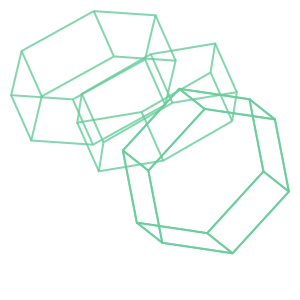

In [9]:
#create a cluster viewed from top down
crystal_hit = cluster.add_crystal_from_above(new_crystal)   
cluster.plot()

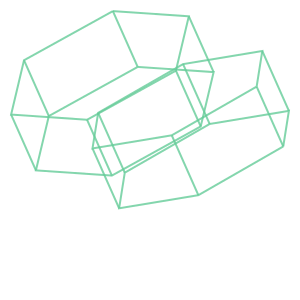

In [7]:
#View the cluster from the side

#if plates:
#    cluster.reorient()
cluster.rotate_to([np.pi/2,np.pi,np.pi/2])
cluster.plot()

if plates:
    cluster.rotate_to([np.pi/2,np.pi,np.pi/2])  #view side -- z axis up down y axis left right
else:
    #no rotation = x,z
    cluster.rotate_to([np.pi/2,0,0]) #y left right,z up down
    #cluster.rotate_to([np.pi/2,np.pi/2,np.pi/2])  #z,y

cluster.rotate_to([np.pi/2,np.pi,np.pi/2])  #view side 

# 3 panel view 

here1
3 2 2.5 5 4 4.6
here1
here2
3 2 2.5 5 4 4.6
here3
3 2 2.5 5 4 4.6


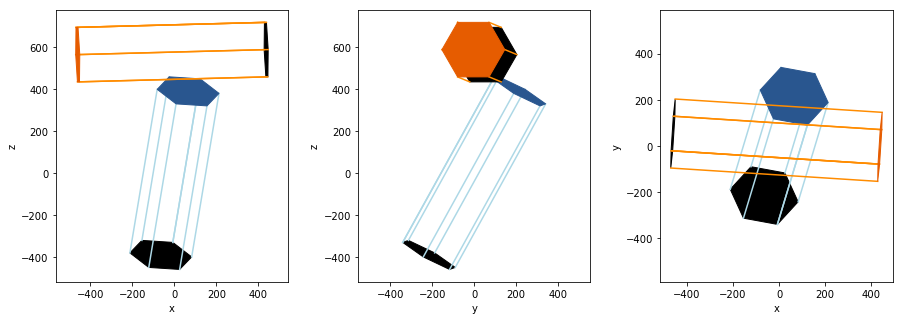

In [9]:
from descartes import PolygonPatch
import operator
from collections import OrderedDict

crystals = [seedcrystal, new_crystal]
dims = [['x','z'],['y','z'],['x','y']]
in_out = ['y','x','z']
fig, ax = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
#ax = ax.ravel()

#print('zrotseed, zrotnew',zrotseed, zrotnew)

for l in range(len(dims)):

    if max(seedcrystal.points[in_out[l]][0:6]) > max(seedcrystal.points[in_out[l]][6:12]):
        hexseedmax = seedcrystal.points[dims[l]][0:6] 
        seedptmax = max(seedcrystal.points[in_out[l]][0:6])
        polyseedmax = geom.Polygon([[p[0], p[1]] for p in hexseedmax])
        hexseedmin = seedcrystal.points[dims[l]][6:12]
        seedptmin = min(seedcrystal.points[in_out[l]][6:12])
        polyseedmin = geom.Polygon([[p[0], p[1]] for p in hexseedmin])
    else:
        hexseedmax = seedcrystal.points[dims[l]][6:12]
        seedptmax = max(seedcrystal.points[in_out[l]][6:12])
        polyseedmax = geom.Polygon([[p[0], p[1]] for p in hexseedmax])
        hexseedmin = seedcrystal.points[dims[l]][0:6]
        seedptmin = min(seedcrystal.points[in_out[l]][0:6])                   
        polyseedmin = geom.Polygon([[p[0], p[1]] for p in hexseedmin])
        
    if max(new_crystal.points[in_out[l]][0:6])> max(new_crystal.points[in_out[l]][6:12]):
        hexnewmax = new_crystal.points[dims[l]][0:6]
        newptmax = max(new_crystal.points[in_out[l]][0:6])
        polynewmax = geom.Polygon([[p[0], p[1]] for p in hexnewmax])
        hexnewmin = new_crystal.points[dims[l]][6:12]
        newptmin = min(new_crystal.points[in_out[l]][6:12])
        polynewmin = geom.Polygon([[p[0], p[1]] for p in hexnewmin])
    else:
        hexnewmax = new_crystal.points[dims[l]][6:12]
        newptmax = max(new_crystal.points[in_out[l]][6:12])
        polynewmax = geom.Polygon([[p[0], p[1]] for p in hexnewmax])
        hexnewmin = new_crystal.points[dims[l]][0:6]
        newptmin = min(new_crystal.points[in_out[l]][0:6])
        polynewmin = geom.Polygon([[p[0], p[1]] for p in hexnewmin])
        
    #polyorder = {'maxseednew': max(seedcrystal.points[in_out[l]][0:6]), new_crystal.points[in_out[l]][0:6])),\
    #             'new1':  max(new_crystal.points[in_out[l]][0:6]),\
    #             'seed2': max(seedcrystal.points[in_out[l]][6:12]), 'new2': max(new_crystal.points[in_out[l]][6:12])}
   
    #sorted_x = OrderedDict(sorted(polyorder.items(), key=lambda t: t[1]))
    #seed1 = list(sorted_x.keys()).index("seed1")
    #new1 = list(sorted_x.keys()).index("new1")
    #seed2 = list(sorted_x.keys()).index("seed2")
    #new2 = list(sorted_x.keys()).index("new2")
   
    
    #zordern=zorders + .1 
    if max(seedcrystal.points[in_out[l]][0:6]) > max(new_crystal.points[in_out[l]][0:6]):
        seedmax = 5
        seedmin = 4
        newmax = 3
        newmin = 2
        print('here1')
        if (l==0):
            seedmax = 3
            seedmin = 2
            newmax = 5
            newmin = 4  
                                 
        if seedptmin < newptmax and  (l == 1):
                                  
            seedmax = 3
            seedmin = 2
            newmax = 5
            newmin = 4
            maxord = max(zorders,seedmin)
            zordern=maxord + .1 
            if (l==1):
                print('here2')
    
    else:
        seedmax = 3
        seedmin = 2
        newmax = 5
        newmin = 4
        print('here3')
            
                                     
        if newptmin < seedptmax and (l == 1):
            
            seedmax = 4
            seedmin = 3
            newmax = 6
            newmin = 5
            maxord = max(zorders,seedmin,seedmax)
            zordern=maxord + .1 
            if (l==1):
                print('here4')       
            
        
    zorders = (seedmin+seedmax)/2
    zordern=(newmin+newmax)/2+.1
    #if newptmin < seedptmax and (l == 1):
    #    maxord = max(zorders,seedmin, seedmax)
    #    #zordern=maxord + .1
    #if seedptmin < newptmax and  (l == 1):
    #    maxord = max(zorders,seedmin,seedmax)
        #zordern=maxord + .1
    
    x1s,y1s = polyseedmax.exterior.xy
    x2s,y2s = polyseedmin.exterior.xy
    x1n,y1n = polynewmax.exterior.xy
    x2n,y2n = polynewmin.exterior.xy
    
    for n in range(7):
        xs = [x1s[n],x2s[n]]
        ys = [y1s[n],y2s[n]]
        xn = [x1n[n],x2n[n]]
        yn = [y1n[n],y2n[n]]
        
        #if (new1 > seed2 and new1 < seed1) or (new2 > seed2 and new2 < seed1) or \
        #(new1 < seed2 and new1 > seed1) or (new2 < seed2 and new2 > seed1):
        #    if l == 1:
        #        print('here')
        #    zordermax = min(zordern, new1, new2)
        #    zorders = zordermax-.1
        #zordern = zorders+.1    
        #newmin = min(new1,new2)
        #if newmin == new1:
        #    seedmin=seedmin+.1
        ax[l].plot(xs,ys,color='lightblue',zorder=zorders)
        ax[l].plot(xn,yn,color='darkorange',zorder=zordern)
    print(seedmax, seedmin, zorders, newmax, newmin, zordern)

    polypatch1s = PolygonPatch(polyseedmax, fill=True, ec='#29568F', fc='#29568F', zorder=seedmax)     
    polypatch2s = PolygonPatch(polyseedmin, fill=True, ec='k', fc='k', zorder=seedmin)
    polypatch1n = PolygonPatch(polynewmax, fill=True, ec='#e65c00', fc='#e65c00', zorder=newmax)     
    polypatch2n = PolygonPatch(polynewmin, fill=True, ec='k', fc='k', zorder=newmin)

    ax[l].add_patch(polypatch1s)
    ax[l].add_patch(polypatch2s)
    ax[l].add_patch(polypatch1n)
    ax[l].add_patch(polypatch2n)
    ax[l].grid(False)
    ax[l].set_aspect('equal', 'datalim')
    ax[l].set_xlabel(dims[l][0])
    ax[l].set_ylabel(dims[l][1])

#seedcrystal.rotate_to([0,yrot,0])
#new_crystal.rotate_to([0,yrot,zrotnew*np.pi/180])  
#new_crystal.rotate_to([0,yrot,0])  
#print(seed1, seed2, zorders, new1, new2, zordern)
plt.show()

5 4 4.5 3 2 2.6
here3
here4
4 3 3.5 5 3.6 4.3999999999999995
3 2 2.5 5 4 4.6


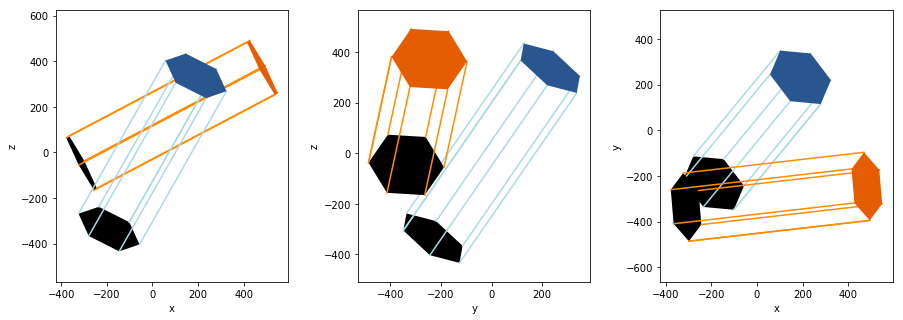

In [603]:
from descartes import PolygonPatch
import operator
from collections import OrderedDict

crystals = [seedcrystal, new_crystal]
dims = [['x','z'],['y','z'],['x','y']]
in_out = ['y','x','z']
fig, ax = plt.subplots(1,3, figsize=(15, 5), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
#ax = ax.ravel()

#print('zrotseed, zrotnew',zrotseed, zrotnew)

for l in range(len(dims)):

    if max(seedcrystal.points[in_out[l]][0:6]) > max(seedcrystal.points[in_out[l]][6:12]):
        hexseedmax = seedcrystal.points[dims[l]][0:6] 
        seedptmax = max(seedcrystal.points[in_out[l]][0:6])
        polyseedmax = geom.Polygon([[p[0], p[1]] for p in hexseedmax])
        hexseedmin = seedcrystal.points[dims[l]][6:12]
        seedptmin = min(seedcrystal.points[in_out[l]][6:12])
        polyseedmin = geom.Polygon([[p[0], p[1]] for p in hexseedmin])
    else:
        hexseedmax = seedcrystal.points[dims[l]][6:12]
        seedptmax = max(seedcrystal.points[in_out[l]][6:12])
        polyseedmax = geom.Polygon([[p[0], p[1]] for p in hexseedmax])
        hexseedmin = seedcrystal.points[dims[l]][0:6]
        seedptmin = min(seedcrystal.points[in_out[l]][0:6])                   
        polyseedmin = geom.Polygon([[p[0], p[1]] for p in hexseedmin])
        
    if max(new_crystal.points[in_out[l]][0:6])> max(new_crystal.points[in_out[l]][6:12]):
        hexnewmax = new_crystal.points[dims[l]][0:6]
        newptmax = max(new_crystal.points[in_out[l]][0:6])
        polynewmax = geom.Polygon([[p[0], p[1]] for p in hexnewmax])
        hexnewmin = new_crystal.points[dims[l]][6:12]
        newptmin = min(new_crystal.points[in_out[l]][6:12])
        polynewmin = geom.Polygon([[p[0], p[1]] for p in hexnewmin])
    else:
        hexnewmax = new_crystal.points[dims[l]][6:12]
        newptmax = max(new_crystal.points[in_out[l]][6:12])
        polynewmax = geom.Polygon([[p[0], p[1]] for p in hexnewmax])
        hexnewmin = new_crystal.points[dims[l]][0:6]
        newptmin = min(new_crystal.points[in_out[l]][0:6])
        polynewmin = geom.Polygon([[p[0], p[1]] for p in hexnewmin])
        
    #polyorder = {'maxseednew': max(seedcrystal.points[in_out[l]][0:6]), new_crystal.points[in_out[l]][0:6])),\
    #             'new1':  max(new_crystal.points[in_out[l]][0:6]),\
    #             'seed2': max(seedcrystal.points[in_out[l]][6:12]), 'new2': max(new_crystal.points[in_out[l]][6:12])}
   
    #sorted_x = OrderedDict(sorted(polyorder.items(), key=lambda t: t[1]))
    #seed1 = list(sorted_x.keys()).index("seed1")
    #new1 = list(sorted_x.keys()).index("new1")
    #seed2 = list(sorted_x.keys()).index("seed2")
    #new2 = list(sorted_x.keys()).index("new2")
   
    
    #zordern=zorders + .1 
    if max(seedcrystal.points[in_out[l]][0:6]) > max(new_crystal.points[in_out[l]][0:6]):
        seedmax = 5
        seedmin = 4
        newmax = 3
        newmin = 2
        
        if l == 1:
            print('here1')
                                 
        if seedptmin < newptmax and  (l == 1):
                                  
            seedmax = 5
            seedmin = 2
            newmax = 4
            newmin = 3
            maxord = max(zorders,seedmin)
            zordern=maxord + .1 
            print('here2')
    
    else:
        seedmax = 3
        seedmin = 2
        newmax = 5
        newmin = 4
        if l == 1:
            print('here3')
                                     
        if newptmin < seedptmax and (l == 1):
            
            seedmax = 4
            seedmin = 3
            newmax = 5
            zorders = (seedmin+seedmax)/2
            newmin = zorders+.1
            
            
            maxord = max(zorders,seedmin,seedmax)
            zordern=maxord + .1 
            
            print('here4')
        
    zorders = (seedmin+seedmax)/2
    zordern=(newmin+newmax)/2+.1
    if newptmin < seedptmax and (l == 1):
        maxord = max(zorders,seedmin, seedmax)
        #zordern=maxord + .1
    if seedptmin < newptmax and  (l == 1):
        maxord = max(zorders,seedmin,seedmax)
        #zordern=maxord + .1
    
    x1s,y1s = polyseedmax.exterior.xy
    x2s,y2s = polyseedmin.exterior.xy
    x1n,y1n = polynewmax.exterior.xy
    x2n,y2n = polynewmin.exterior.xy
    
    
    
    for n in range(7):
        xs = [x1s[n],x2s[n]]
        ys = [y1s[n],y2s[n]]
        xn = [x1n[n],x2n[n]]
        yn = [y1n[n],y2n[n]]
        
        #if (new1 > seed2 and new1 < seed1) or (new2 > seed2 and new2 < seed1) or \
        #(new1 < seed2 and new1 > seed1) or (new2 < seed2 and new2 > seed1):
        #    if l == 1:
        #        print('here')
        #    zordermax = min(zordern, new1, new2)
        #    zorders = zordermax-.1
        #zordern = zorders+.1    
        #newmin = min(new1,new2)
        #if newmin == new1:
        #    seedmin=seedmin+.1
        ax[l].plot(xs,ys,color='lightblue',zorder=zorders)
        ax[l].plot(xn,yn,color='darkorange',zorder=zordern)
    print(seedmax, seedmin, zorders, newmax, newmin, zordern)

    polypatch1s = PolygonPatch(polyseedmax, fill=True, ec='none', fc='#29568F', zorder=seedmax)     
    polypatch2s = PolygonPatch(polyseedmin, fill=True, ec='none', fc='k', zorder=seedmin)
    polypatch1n = PolygonPatch(polynewmax, fill=True, ec='none', fc='#e65c00', zorder=newmax)     
    polypatch2n = PolygonPatch(polynewmin, fill=True, ec='none', fc='k', zorder=newmin)

    ax[l].add_patch(polypatch1s)
    ax[l].add_patch(polypatch2s)
    ax[l].add_patch(polypatch1n)
    ax[l].add_patch(polypatch2n)
    ax[l].grid(False)
    ax[l].set_aspect('equal', 'datalim')
    ax[l].set_xlabel(dims[l][0])
    ax[l].set_ylabel(dims[l][1])


#seedcrystal.rotate_to([0,yrot,0])
#new_crystal.rotate_to([0,yrot,zrotnew*np.pi/180])  
#new_crystal.rotate_to([0,yrot,0])  
#print(seed1, seed2, zorders, new1, new2, zordern)
plt.show()

# Contact Angle 

xrot,yrot 1.04719766306 1.26510643646
zrotseed 161.9486572068074
zrotnew 123.35958543154169


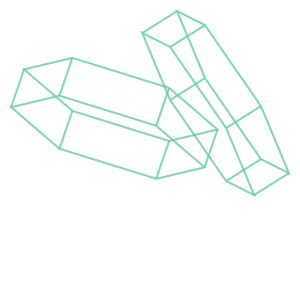

In [171]:
import scipy.optimize as opt
import random
import numpy as np
import ipas.lab_opt_rot as lab
import ipas.crystals_opt_rot as crys


#length=13.6790022746 * 10
#width=8.55013140036 * 10

length=20.6 * 10
width=100.5 * 10

rotations= 100
plates = width > length

f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[0,x,0]).projectxy().area
yrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x
f = lambda x: -crys.IceCrystal(length=length, width=width, rotation=[x,0,0]).projectxy().area
xrot = opt.minimize_scalar(f, bounds=(0, np.pi/2), method='Bounded').x

print('xrot,yrot',xrot,yrot)
rotation = [0, yrot, random.uniform(0, 2 * np.pi)]
dimarr = ['y','z']
dim = 'y'
dim_up = 'z'
dimind = 0
dimindup = 1

if plates:
    hypot = width
else:
    hypot = length
    
#print('yrot',yrot)
#rotation = [0,np.pi/2,np.pi/2-1.0]
zrotseed = rotation[2]*180/np.pi
print('zrotseed',zrotseed)

seedcrystal = crys.IceCrystal(length=length, width=width, rotation=rotation)
cluster = crys.IceCluster(seedcrystal)

xmax = cluster.max('x')
ymax = cluster.max('y')
zmax = cluster.max('z')
xmin = cluster.min('x')
ymin = cluster.min('y')
zmin = cluster.min('z') 

ncrystals = 2
while cluster.ncrystals < ncrystals:
    
    rotation = [0, yrot, random.uniform(0, 2 * np.pi)]
    #rotation = [0,np.pi/2,np.pi/2+.9]
    zrotnew = rotation[2]*180/np.pi
    print('zrotnew',zrotnew)
    new_crystal = crys.IceCrystal(length=length, width=width, rotation=rotation)
    random_loc = [random.uniform(xmin, xmax), random.uniform(ymin, ymax), 0]
    new_crystal.move(random_loc)

    crystal_hit = cluster.add_crystal_from_above(new_crystal)   

    if crystal_hit:
        cluster.recenter()

        height_seed = seedcrystal.maxz - seedcrystal.minz   
        height_new = new_crystal.maxz - new_crystal.minz
        checkposseed = False
        checkposnew = False
        checknegseed = False
        checknegnew = False

        xmaxseed = seedcrystal.max(dim)
        xminseed = seedcrystal.min(dim)
        pointszseed = seedcrystal.points[dim_up]
        pointsxseed = seedcrystal.points[dim]
        maxzindseed = np.where(pointszseed == seedcrystal.max(dim_up))
        minzindseed = np.where(pointszseed == seedcrystal.min(dim_up))
        xatmaxzseed = max(seedcrystal.points[dim][maxzindseed])
        xatminzseed = min(seedcrystal.points[dim][minzindseed])
        maxxindseed = np.where(pointsxseed == xmaxseed)
        minxindseed = np.where(pointsxseed == xminseed)
        zatmaxxseed = max(pointszseed[maxxindseed])
        zatminxseed = min(pointszseed[minxindseed])

        #print('-----------------new crys-------------------')
        xmaxnew = new_crystal.max(dim)
        xminnew = new_crystal.min(dim)
        pointsznew = new_crystal.points[dim_up]
        pointsxnew = new_crystal.points[dim]
        maxzindnew = np.where(pointsznew == new_crystal.max(dim_up))
        minzindnew = np.where(pointsznew == new_crystal.min(dim_up))
        xatmaxznew = max(new_crystal.points[dim][maxzindnew])
        xatminznew = min(new_crystal.points[dim][minzindnew])
        maxxindnew = np.where(pointsxnew == xmaxnew) 
        minxindnew = np.where(pointsxnew == xminnew) 
        zatmaxxnew = max(pointsznew[maxxindnew])
        zatminxnew = min(pointsznew[minxindnew])


        crystals = [seedcrystal, new_crystal]
        slope=[]
        hexmax = []
        hexmin = []

        #fig = pl.figure(1, figsize=(5,5))
        #ax = fig.add_subplot(111)

        for i in crystals:
            # make a line connecting the two hexagons at the max x value  
            #this is to determine the slope of each crystal
            hex1pts = i.points[dimarr][0:6]  
            hex2pts = i.points[dimarr][6:12]  

            poly1 = geom.Polygon([[p[0], p[1]] for p in hex1pts])       
            poly2 = geom.Polygon([[p[0], p[1]] for p in hex2pts])

            #add patches here

            hex1max = max(hex1pts[dimarr],key=itemgetter(dimindup))
            hex1min = min(hex1pts[dimarr],key=itemgetter(dimindup))
            #print('hex1min',hex1min)
            #print('hex2pts',hex2pts)
            hex2max = max(hex2pts[dimarr],key=itemgetter(dimindup))
            hex2min = min(hex2pts[dimarr],key=itemgetter(dimindup))
            #print('hex2min',hex2min)

            #Plates: when the lines connecting the hexagons slope positive the crystal slopes negative
            #Columns: when the lines connecting the hexagons slope positive the crystal also slopes positive 
            if (hex2max[dimarr[dimindup]]-hex1max[dimarr[dimindup]])/(hex2max[dimarr[dimind]]-hex1max[dimarr[dimind]])>=0:
                if plates:
                    slope.append('negative')
                else:
                    slope.append('positive')
            else:
                if plates:
                    slope.append('positive')
                else:
                    slope.append('negative')

            #hexmaxval = min(hex2max[dimarr[dimind]],hex1max[dimarr[dimind]])
            hexminval = max(hex1min,hex2min,key=itemgetter(dimindup))
            #hexminval = max(hex2min[dimarr[dimind]],hex1min[dimarr[dimind]])
            hexmaxval = min(hex1max,hex2max,key=itemgetter(dimindup))

            hexmax.append(hexmaxval[dimarr[dimind]])
            hexmin.append(hexminval[dimarr[dimind]])
        #----------------------------------------------------------------
        #Determine what slope each crystal has and calculate the seed_ang/
        #new_ang for each crystal
        if slope[0] == 'negative': #neg slope
            checknegseed = True
            #print('checknegseed')
            if plates:
                baseseed = hexmax[0] - xminseed
            else:
                baseseed = xatminzseed - hexmin[0]
            #print('baseseed neg', baseseed)
            #print('xatminzseed, hexmin[0]', xatminzseed,hexmin[0])
            #print('hexmin[0], hexmax[0]',hexmin[0], hexmax[0])
            seed_ang = np.arccos(baseseed/hypot)*(180./np.pi)          

        else:
            checkposseed = True 
            #print('checkposseed')
            if plates:
                baseseed = xmaxseed - hexmin[0]
            else:
                baseseed = hexmin[0] - xatminzseed   
            #print('baseseed pos',baseseed)
            #print('hexmax, xatminzseed',hexmax[0], xatminzseed)
            seed_ang = np.arccos(baseseed/hypot)*(180./np.pi) 


        if slope[1]=='negative':
            checknegnew = True
            #print('checknegnew')
            if plates:
                basenew = hexmax[1] - xminnew
            else:
                basenew = xatminznew - hexmin[1]
            #print('base',basenew, hypot)
            #print('hexmin, xatminznew',hexmin[1], xatminznew)
            new_ang = np.arccos(basenew/hypot)*(180./np.pi) 

        else: #pos slope

            checkposnew = True
            #print('checkposnew')

            if plates:
                basenew = xmaxnew - hexmin[1]
            else:
                basenew = hexmin[1] - xatminznew
            #print('base, hypot',basenew, hypot)
            #print('hexmin, xatminznew',hexmin[1], xatminznew)    
            new_ang = np.arccos(basenew/hypot)*(180./np.pi) 

        ##################################################################################    

        #Check if overlap is minimal and don't subtract from 180

        #horizontal overlap
        in_out = ['y','x','z','x']
        percent = []
        for i in range(2):
            xmax = cluster.max(in_out[i])
            xmin = cluster.min(in_out[i])
            xmaxseed = seedcrystal.max(in_out[i])
            xminseed = seedcrystal.min(in_out[i])
            xmaxnew = new_crystal.max(in_out[i])
            xminnew = new_crystal.min(in_out[i])
            widclus = xmax-xmin
            widseed = xmaxseed - xminseed
            widnew = xmaxnew - xminnew
            #print(widclus, xmax, xmin)


            Sx = widclus - (widclus - widseed) - (widclus - widnew)
            if plates:
                percentage = (Sx / widclus)*100   
            else:
                percentage = (Sx / widclus)*100
            percent.append(percentage)

        #print('X overlap', percent[1])
        #print('Y overlap', percent[0])

        zmax = cluster.max(dim_up)
        zmin = cluster.min(dim_up)
        plates = width > length
        height_seed = seedcrystal.max(dim_up) - seedcrystal.min(dim_up)   
        height_new = new_crystal.max(dim_up) - new_crystal.min(dim_up)              
        heightclus = zmax-zmin #0 index is x
        Sz = heightclus - (heightclus - height_seed) - (heightclus - height_new)    
        if plates:
            percentage = (Sz / heightclus)*100   
        else:
            percentage = (Sz / heightclus)*100
        percent.append(percentage)
        #print('vert_overlap', percent[2])


        cont_ang = new_ang + seed_ang
        cont_ang1 = new_ang + seed_ang
        #print('cont_ang b4 if1', cont_ang)
        if ((checkposseed == True and checkposnew == True) or (checknegseed == True and checknegnew == True)):  
            #print('in if1 -- crystals slope in same direction')
            seed1_ang = 90. - seed_ang
            cont_ang = 90. - new_ang - seed1_ang
            if1flag = True

        cont_ang = abs(cont_ang)
        #print('cont_ang b4 if2', cont_ang)
        if cont_ang1 > 90 and percent[1] > 20.0 and cont_ang < 90:
            #print('in if2')
            cont_ang = 180 - cont_ang

        #---------umcomment this for different cluster views------
        if plates:
            cluster.rotate_to([np.pi/2,np.pi,np.pi/2])  #view side -- z axis up down y axis left right
        else:
            #no rotation = x,z
            cluster.rotate_to([np.pi/2,0,0]) #y left right,z up down
            #cluster.rotate_to([np.pi/2,np.pi/2,np.pi/2])  #z,y

        #print('seed, new final',seed_ang,new_ang)
        #print('contact angle',cont_ang)
        cluster.rotate_to([np.pi/2,np.pi,np.pi/2])  #view side 
cluster.plot()

### OVERLAP

39.26971015200612


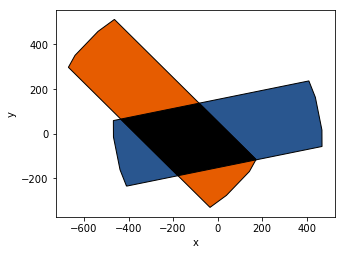

In [539]:
crystals = [seedcrystal, new_crystal]
dims = ['x','y']

fig = plt.figure(1, figsize=(5,5))
ax = fig.add_subplot(111)
area = []
for i in crystals:    
 
    newpoly = i.projectxy()
    area.append(newpoly.area)
    
    if i == seedcrystal:
        color='#29568F'
        zorder = 1
        linecolor = '#29568F'

    else:
        zorder = 2
        color='#e65c00'
        linecolor = '#e65c00'


    cryspatch = PolygonPatch(newpoly, fill=True, ec='k', fc=color, zorder=zorder)     
    ax.add_patch(cryspatch)
    
rel_area = seedcrystal.projectxy().intersection(new_crystal.projectxy())
ovrlpptch = PolygonPatch(rel_area, fill=True, ec='k', fc='k', zorder=zorder) 
ax.add_patch(ovrlpptch)
seedpoly = seedcrystal.projectxy()
newpoly = new_crystal.projectxy()   
pctovrlp = (2*rel_area.area/(seedpoly.area+newpoly.area))*100
print(pctovrlp)


ax.set_xlabel(dims[0])
ax.set_ylabel(dims[1])
ax.axis('scaled')

plt.show()

###### A different run on how to plot specific aggregates out of numclusters

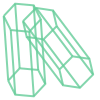

In [151]:
import ipas.crystals as ipas
#seedcrystal = ipas.IceCrystal(length=100, width=6, rotation=(0,np.pi/2-.1,0))
#cluster = ipas.IceCluster([seedcrystal])
b2 = b1.clusters[0]
b2.rotate_to([np.pi/2,0,np.pi/2])
b2.plot()

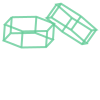

In [147]:
import ipas.crystals as ipas
#seedcrystal = ipas.IceCrystal(length=100, width=6, rotation=(0,np.pi/2-.1,0))
#cluster = ipas.IceCluster([seedcrystal])
b2 = b1.clusters[8]
b2.rotate_to([np.pi/2,0,np.pi/2])
b2.plot()

In [40]:
import matplotlib.pyplot as plt
plt.close("all")

In [69]:
phio=np.logspace(-2, 2, num=30, endpoint=True, base=10.0, dtype=None)
np.set_printoptions(suppress=True)
print(phio)


[   0.01          0.01373824    0.01887392    0.02592944    0.03562248
    0.04893901    0.06723358    0.09236709    0.1268961     0.17433288
    0.23950266    0.32903446    0.45203537    0.62101694    0.85316785
    1.1721023     1.61026203    2.21221629    3.03919538    4.17531894
    5.73615251    7.88046282   10.82636734   14.87352107   20.43359718
   28.07216204   38.56620421   52.98316906   72.78953844  100.        ]


In [88]:
phio=np.logspace(-2, 2., num=20, endpoint=True, base=10.0, dtype=None)#just columns (0,2); plates (-2,2)
np.set_printoptions(suppress=True)
add = [.32, .43, .54, .62, .73, .84, .95, 2.2, 3.3, 4.4]
phio = np.append(phio, add, axis=0) 
print(sorted(phio))


[0.01, 0.016237767391887217, 0.026366508987303583, 0.042813323987193938, 0.069519279617756058, 0.11288378916846889, 0.18329807108324356, 0.29763514416313175, 0.32000000000000001, 0.42999999999999999, 0.48329302385717521, 0.54000000000000004, 0.62, 0.72999999999999998, 0.78475997035146106, 0.83999999999999997, 0.94999999999999996, 1.2742749857031335, 2.0691380811147901, 2.2000000000000002, 3.2999999999999998, 3.3598182862837809, 4.4000000000000004, 5.4555947811685144, 8.8586679041008232, 14.384498882876629, 23.357214690901213, 37.92690190732246, 61.584821106602604, 100.0]


In [178]:
phioadd=np.logspace(-.301, .301, num=10, endpoint=True, base=10.0, dtype=None)
print(phioadd)

[ 0.50003453  0.58329585  0.68042111  0.7937188   0.92588182  1.08005145
  1.25989204  1.4696781   1.71439587  1.99986187]


In [9]:
phio=np.logspace(-2, 2., num=20, endpoint=True, base=10.0, dtype=None)#just columns (0,2); plates (-2,2)
lengtharr = []
widtharr = []
for i in phio:
        width = (1000/i)**(1./3.) #equivalent volume length and width for each aspect ratio
        widtharr.append(width)
        length=i*width
        lengtharr.append(length)
print(lengtharr)
print(widtharr)

[0.46415888336127781, 0.64123547955769178, 0.88586679041008254, 1.2238249369681926, 1.6907141034735804, 2.3357214690901218, 3.226799119945809, 4.4578228604197072, 6.1584821106602616, 8.5079427996274468, 11.753722651306358, 16.237767391887221, 22.432475028984186, 30.990463391994265, 42.813323987193925, 59.146605445917494, 81.711033154571979, 112.88378916846882, 155.94895040582819, 215.44346900318837]
[46.415888336127779, 39.490372295767003, 33.598182862837817, 28.585141796844734, 24.320075132679477, 20.691380811147894, 17.60410843865553, 14.977474763452012, 12.742749857031336, 10.841458689358348, 9.2238510393584789, 7.8475997035146117, 6.6766929391875651, 5.6804921617284281, 4.8329302385717536, 4.1118294024358315, 3.4983209357750371, 2.9763514416313188, 2.5322627816987953, 2.1544346900318838]
